In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


this are the top 5 rows of the dataset.


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


this are the last 5 rows of the dataset.

In [5]:
df.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
29636,27,Private,193898,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,52,United-States,<=50K
17556,58,Local-gov,489085,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,<=50K
18002,30,Federal-gov,49593,Prof-school,15,Never-married,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,<=50K
9639,33,Private,276221,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
19843,43,Federal-gov,175669,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K


this are the some random samples taken from the dataset.

In [6]:
df.shape

(32560, 15)

this dataset contains the  rows and columns out of that is our target variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


in the info method as we see 6 columns are from (int64) and 9 columns are from ('object'). 

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

this are the data types of the features ('columns').

In [9]:
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

this are the features name.

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

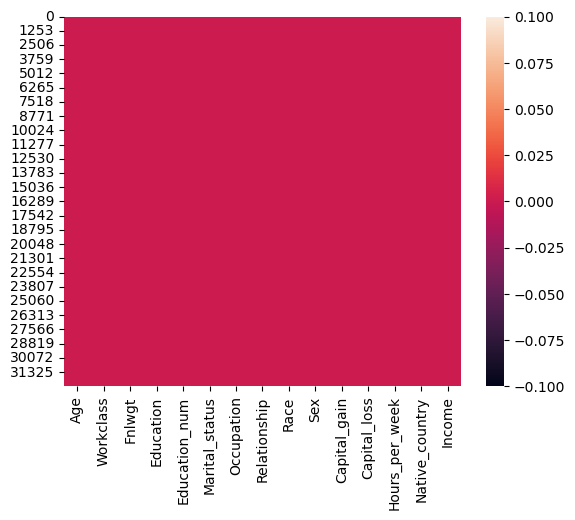

In [12]:
sns.heatmap(df.isnull())

as we can see in the heatmap their is no null values present in the dataset.

In [13]:
df.nunique().to_frame('no. unique values')

,no. unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


# separating the features 

In [14]:
categorical_col=[]
numerical_col=[]

for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append([i])
    else:
        numerical_col.append([i])
        
        
print('categorical_columns',categorical_col)
print('\n')
print('numerical_col',numerical_col)

categorical_columns [['Workclass'], ['Education'], ['Marital_status'], ['Occupation'], ['Relationship'], ['Race'], ['Sex'], ['Native_country'], ['Income']]


numerical_col [['Age'], ['Fnlwgt'], ['Education_num'], ['Capital_gain'], ['Capital_loss'], ['Hours_per_week']]


In [15]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


as we can see in the dataset the mean value is greater than the median value in the features ('capital_gain','Capital_loss') it means this features are right skewed.

in the dataset the outliers are present in the dataset because we are having some difference between the (75%) percentile and the (100%) percentle. 

# Data Analysis.

univariate Analysis.

In [16]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


17
38.581633906633904
0    36
Name: Age, dtype: int64


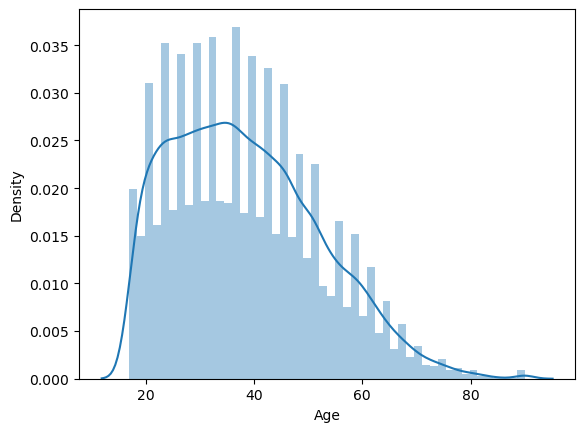

In [17]:
print(df['Age'].min())
print(df['Age'].mean())
print(df['Age'].mode())

sns.distplot(df['Age'])
plt.show()

as we can see in the 'Age' feature the frequency is high between the 25 to 40.

In [18]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


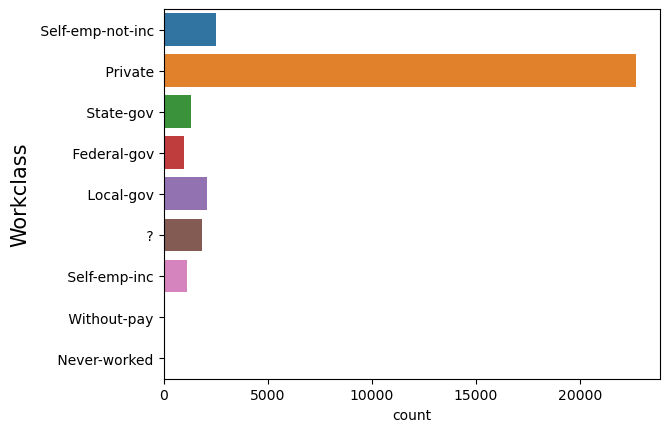

In [19]:
print(df['Workclass'].value_counts())
sns.countplot(y='Workclass',data=df)
plt.ylabel('Workclass',fontsize=15)
plt.show()

as we can see the count of ('private') is high in the feature  of ('Workclass').

12285
189781.81437346438
0    123011
1    164190
2    203488
Name: Fnlwgt, dtype: int64


<Axes: xlabel='Fnlwgt', ylabel='Density'>

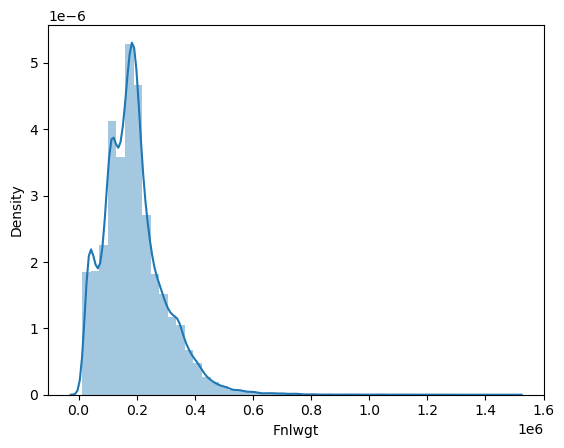

In [20]:
print(df['Fnlwgt'].min())
print(df['Fnlwgt'].mean())
print(df['Fnlwgt'].mode())
sns.distplot(df['Fnlwgt'])

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


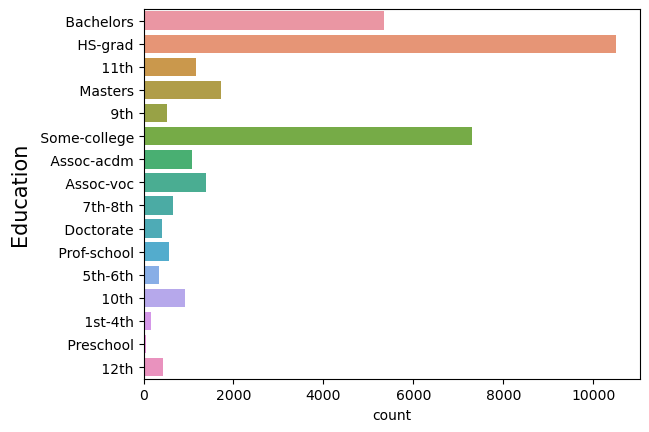

In [21]:
print(df['Education'].value_counts())
sns.countplot(y='Education',data=df)
plt.ylabel('Education',fontsize=15)
plt.show()

as we can see the count is high in the ('HS-grad') feature.

0    9
Name: Education_num, dtype: int64


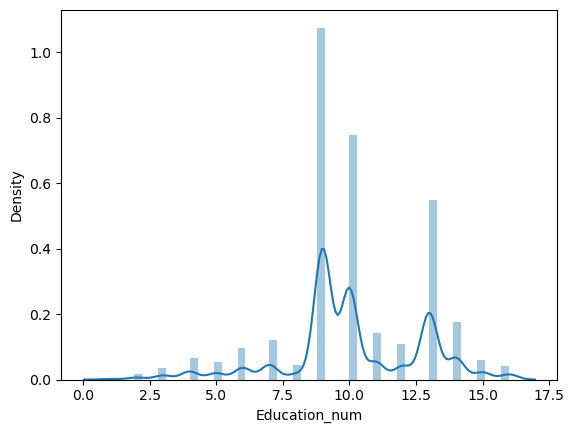

In [22]:
print(df['Education_num'].mode())
sns.distplot(df['Education_num'])
plt.show()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


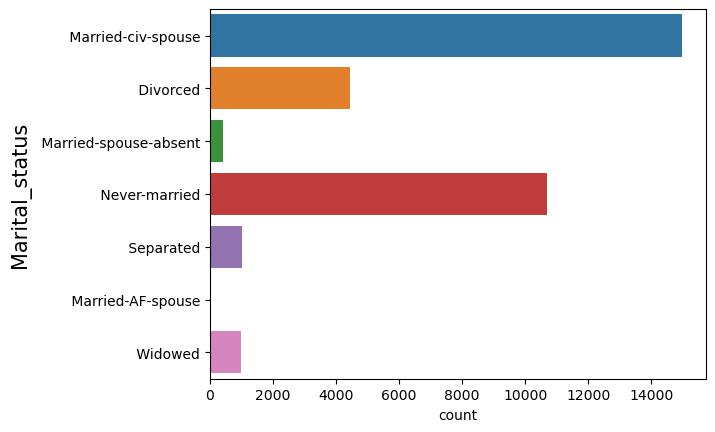

In [23]:
print(df['Marital_status'].value_counts())
sns.countplot(y='Marital_status',data=df)
plt.ylabel('Marital_status',fontsize=15)
plt.show()

the count of ('Married-civ-spouse','Never-married') feature is high then the other features.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


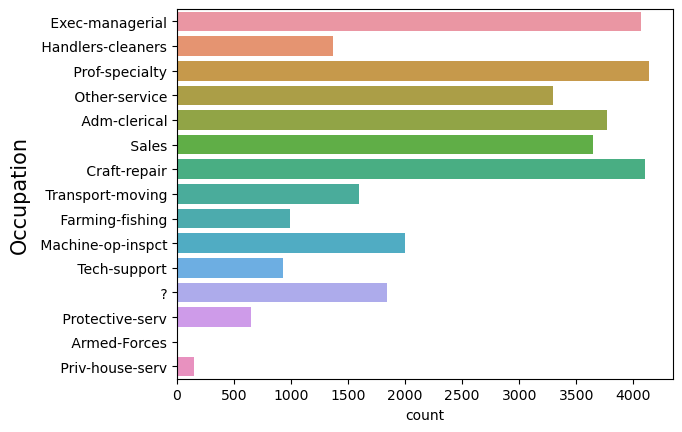

In [24]:
print(df['Occupation'].value_counts())
sns.countplot(y='Occupation',data=df)
plt.ylabel('Occupation',fontsize=15)
plt.show()

this are the count for the occupation feature.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


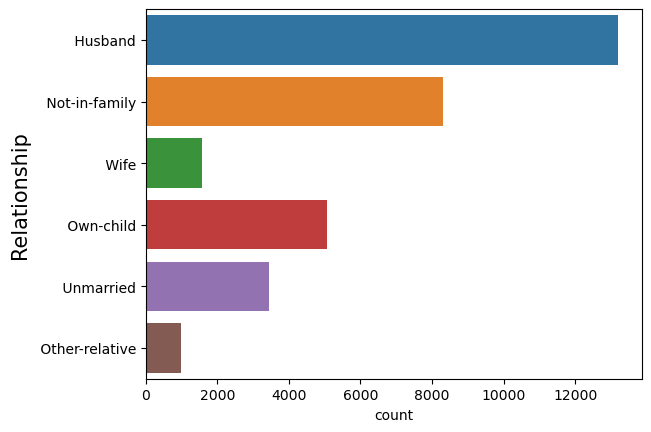

In [25]:
print(df['Relationship'].value_counts())
sns.countplot(y='Relationship',data=df)
plt.ylabel('Relationship',fontsize=15)
plt.show()

the count of ('Husband','Not-in-family') are high in the Relationship feeature.

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


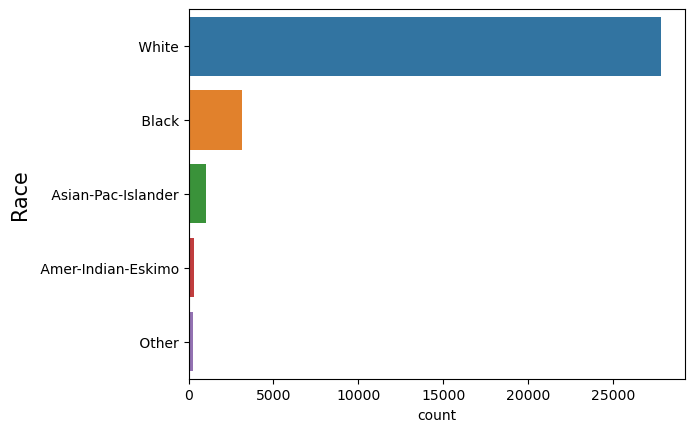

In [26]:
print(df['Race'].value_counts())
sns.countplot(y='Race',data=df)
plt.ylabel('Race',fontsize=15)
plt.show()

the count of ('white') is high in the feature ('Race')

 Male      21789
 Female    10771
Name: Sex, dtype: int64


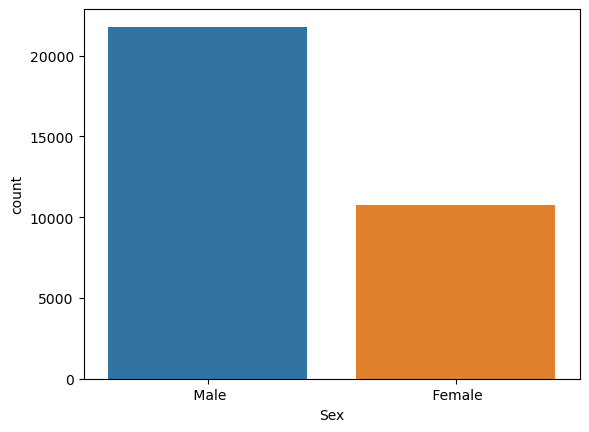

In [27]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df)
plt.show()

the count of ('male') is high in the feature ('Sex').

1077.615171990172
0.0
0    0
Name: Capital_gain, dtype: int64


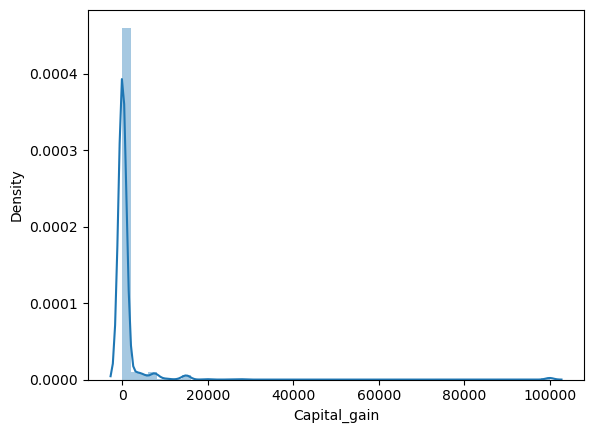

In [28]:
print(df['Capital_gain'].mean())
print(df['Capital_gain'].median())
print(df['Capital_gain'].mode())
sns.distplot(df['Capital_gain'])
plt.show()

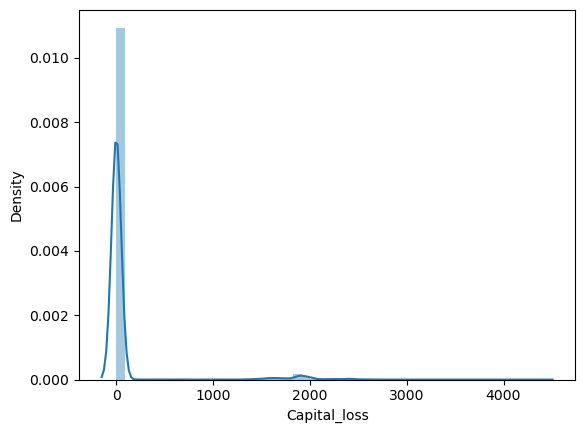

In [29]:
sns.distplot(df['Capital_loss'])
plt.show()

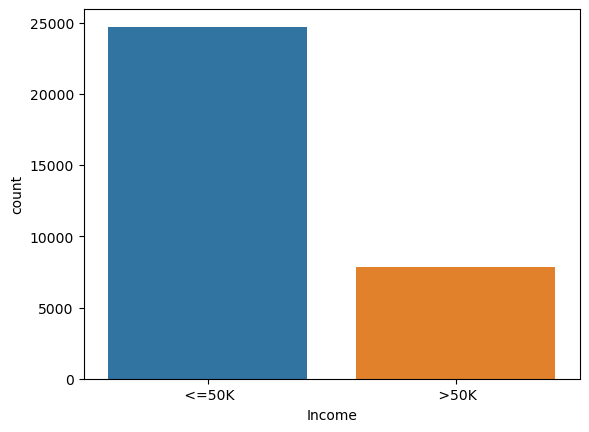

In [30]:
sns.countplot(x='Income',data=df)
plt.show()

most of the persons in our dataset they have their income less then or equals to  50k.

Biavariate Analysis.

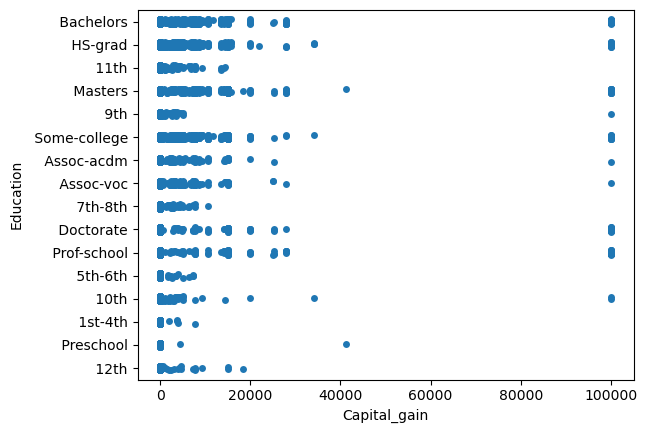

In [31]:
sns.stripplot(y='Education',x='Capital_gain',data=df)
plt.show()

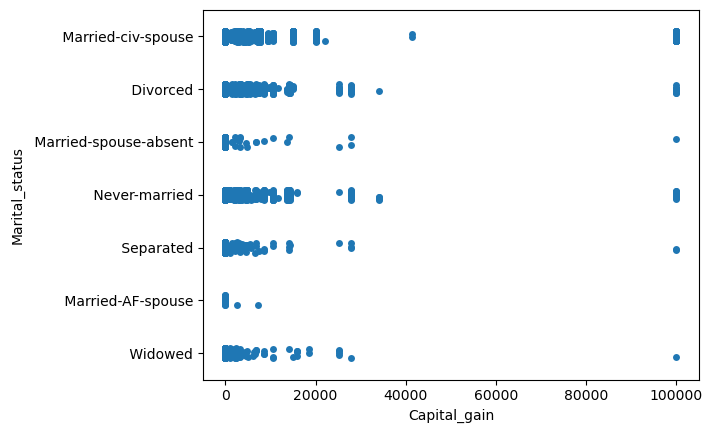

In [32]:
sns.stripplot(y='Marital_status',x='Capital_gain',data=df)
plt.show()

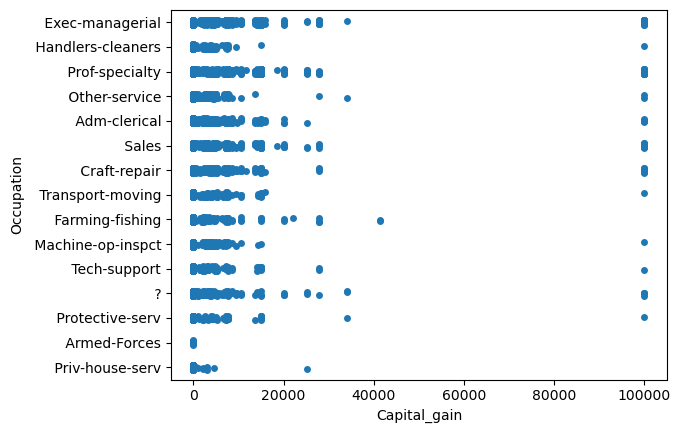

In [33]:
sns.stripplot(x='Capital_gain',y='Occupation',data=df)
plt.show()

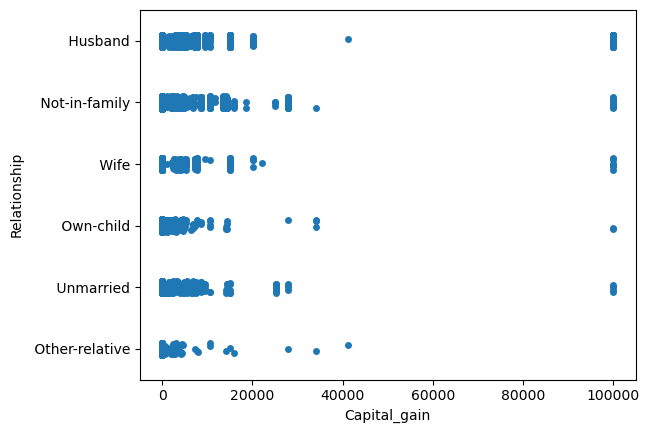

In [34]:
sns.stripplot(x='Capital_gain',y='Relationship',data=df)
plt.show()

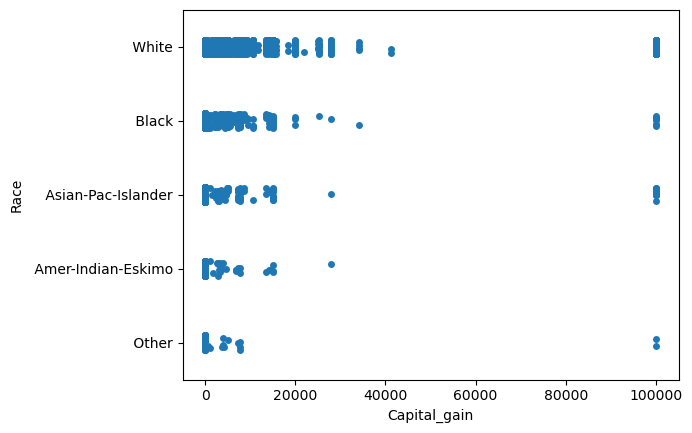

In [35]:
sns.stripplot(x='Capital_gain',y='Race',data=df)
plt.show()

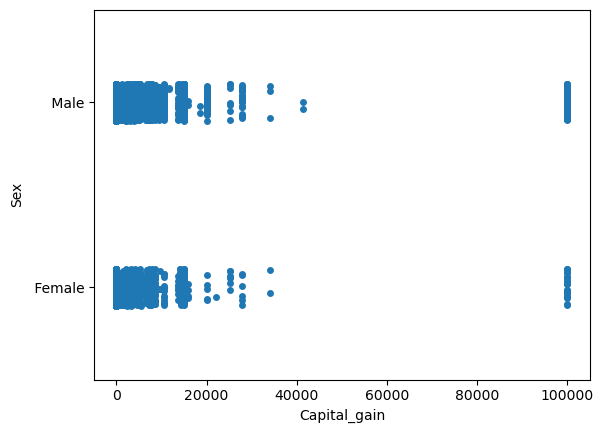

In [36]:
sns.stripplot(x='Capital_gain',y='Sex',data=df)
plt.show()

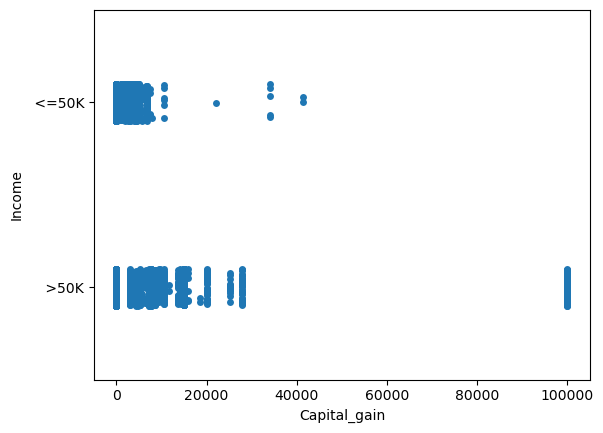

In [37]:
sns.stripplot(x='Capital_gain',y='Income',data=df)
plt.show()

In [38]:
list1=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Income']

Axes(0.125,0.11;0.775x0.77)


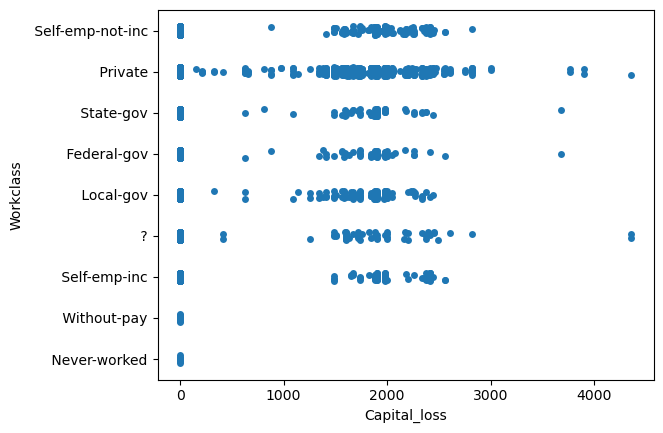

Axes(0.125,0.11;0.775x0.77)


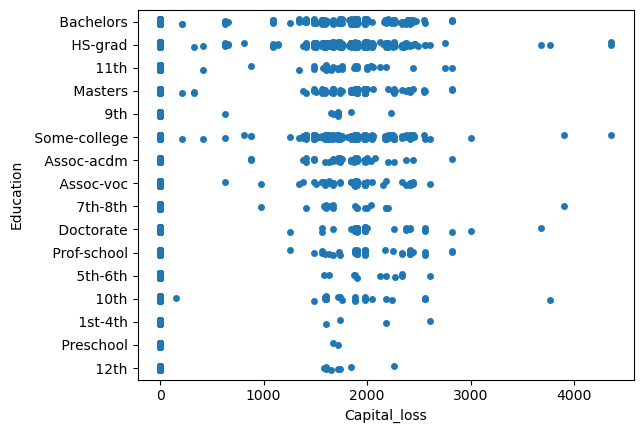

Axes(0.125,0.11;0.775x0.77)


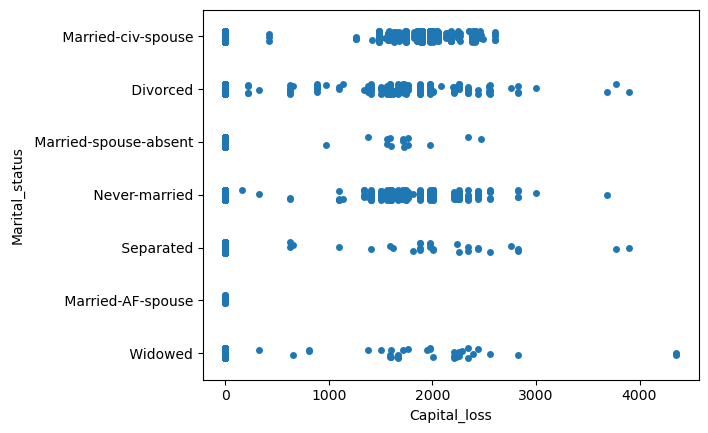

Axes(0.125,0.11;0.775x0.77)


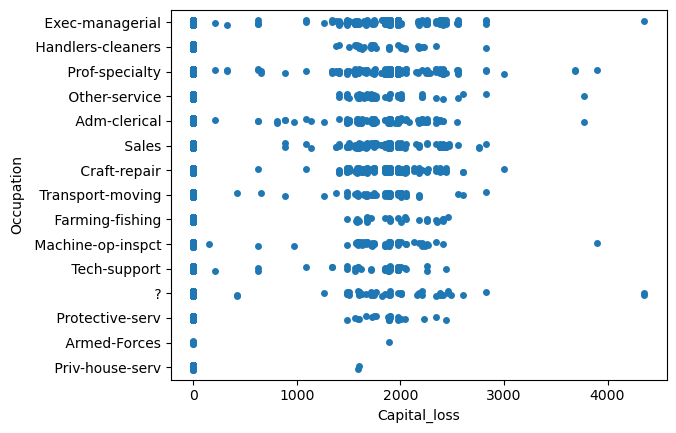

Axes(0.125,0.11;0.775x0.77)


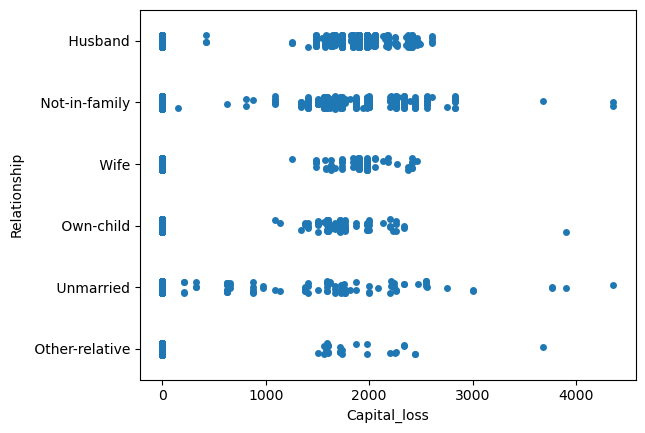

Axes(0.125,0.11;0.775x0.77)


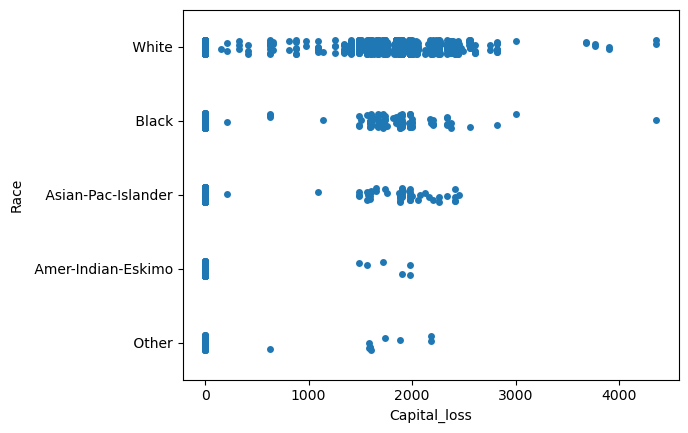

Axes(0.125,0.11;0.775x0.77)


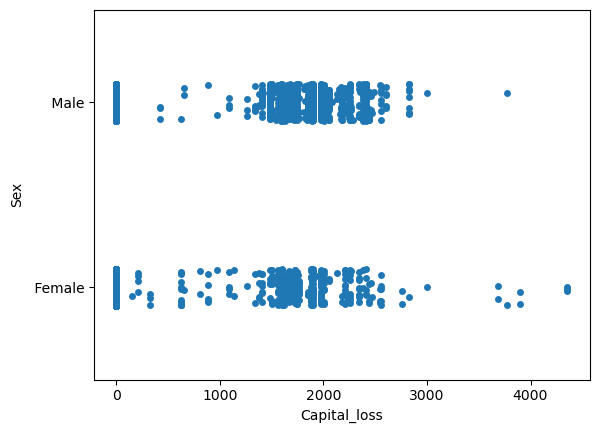

Axes(0.125,0.11;0.775x0.77)


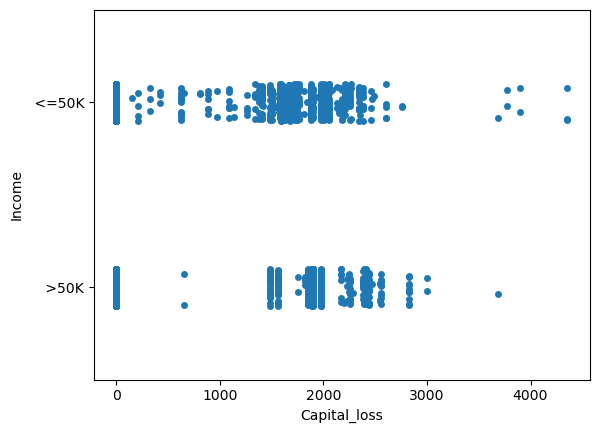

In [39]:
for i in list1:
    print(sns.stripplot(x='Capital_loss',y=i,data=df))
    plt.show()

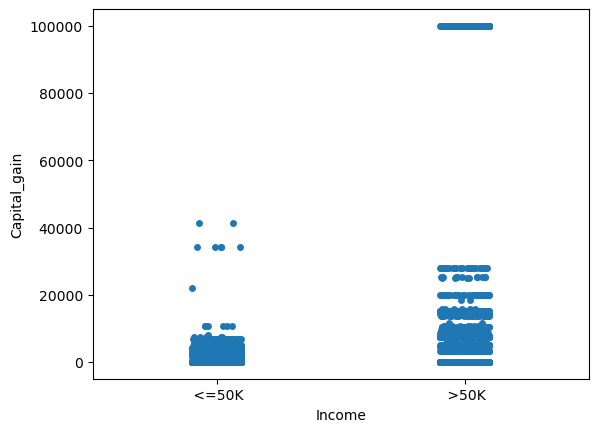

In [40]:
sns.stripplot(x='Income',y='Capital_gain',data=df)
plt.show()

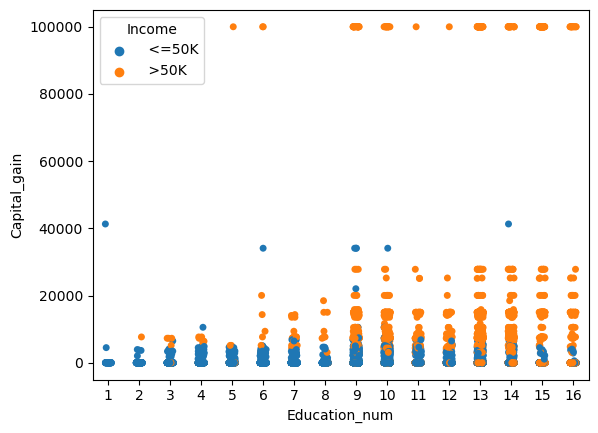

In [41]:
sns.stripplot(x='Education_num',y='Capital_gain',hue='Income',data=df)
plt.show()

the people who are lieng between the 9 to 10 Education_num so their capital gain is bit  high than the other people.  

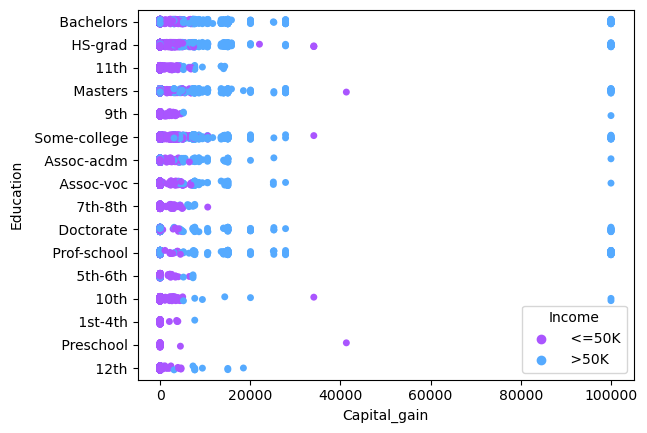

In [42]:
sns.stripplot(y='Education',x='Capital_gain',hue='Income',palette='cool_r',data=df)
plt.show()

In [43]:
df.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


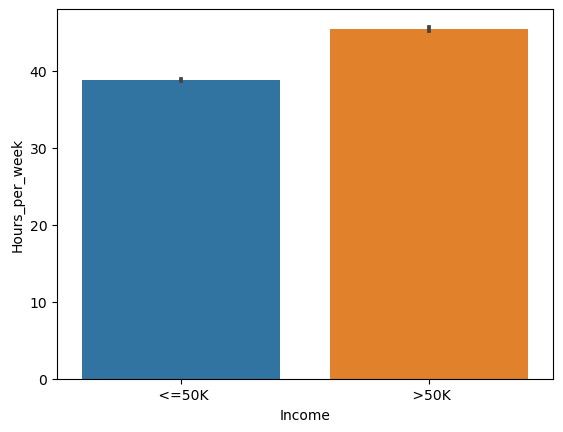

In [44]:
sns.barplot(x='Income',y='Hours_per_week',data=df)
plt.show()

as we can see the peoples who are working for 40 hours or more then that they have their income greater than  50k.

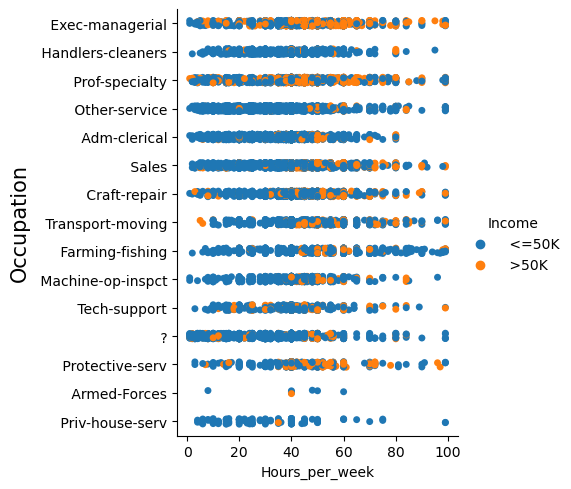

In [45]:
sns.catplot(y='Occupation',x='Hours_per_week',hue='Income',data=df)
plt.ylabel('Occupation',fontsize=15)
plt.show()

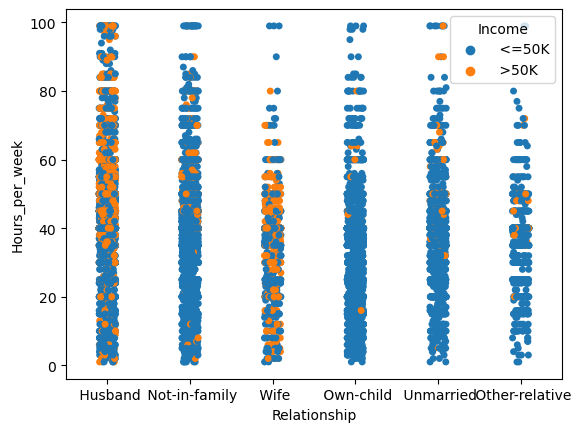

In [46]:
sns.stripplot(x='Relationship',y='Hours_per_week',hue='Income',data=df)
plt.show()

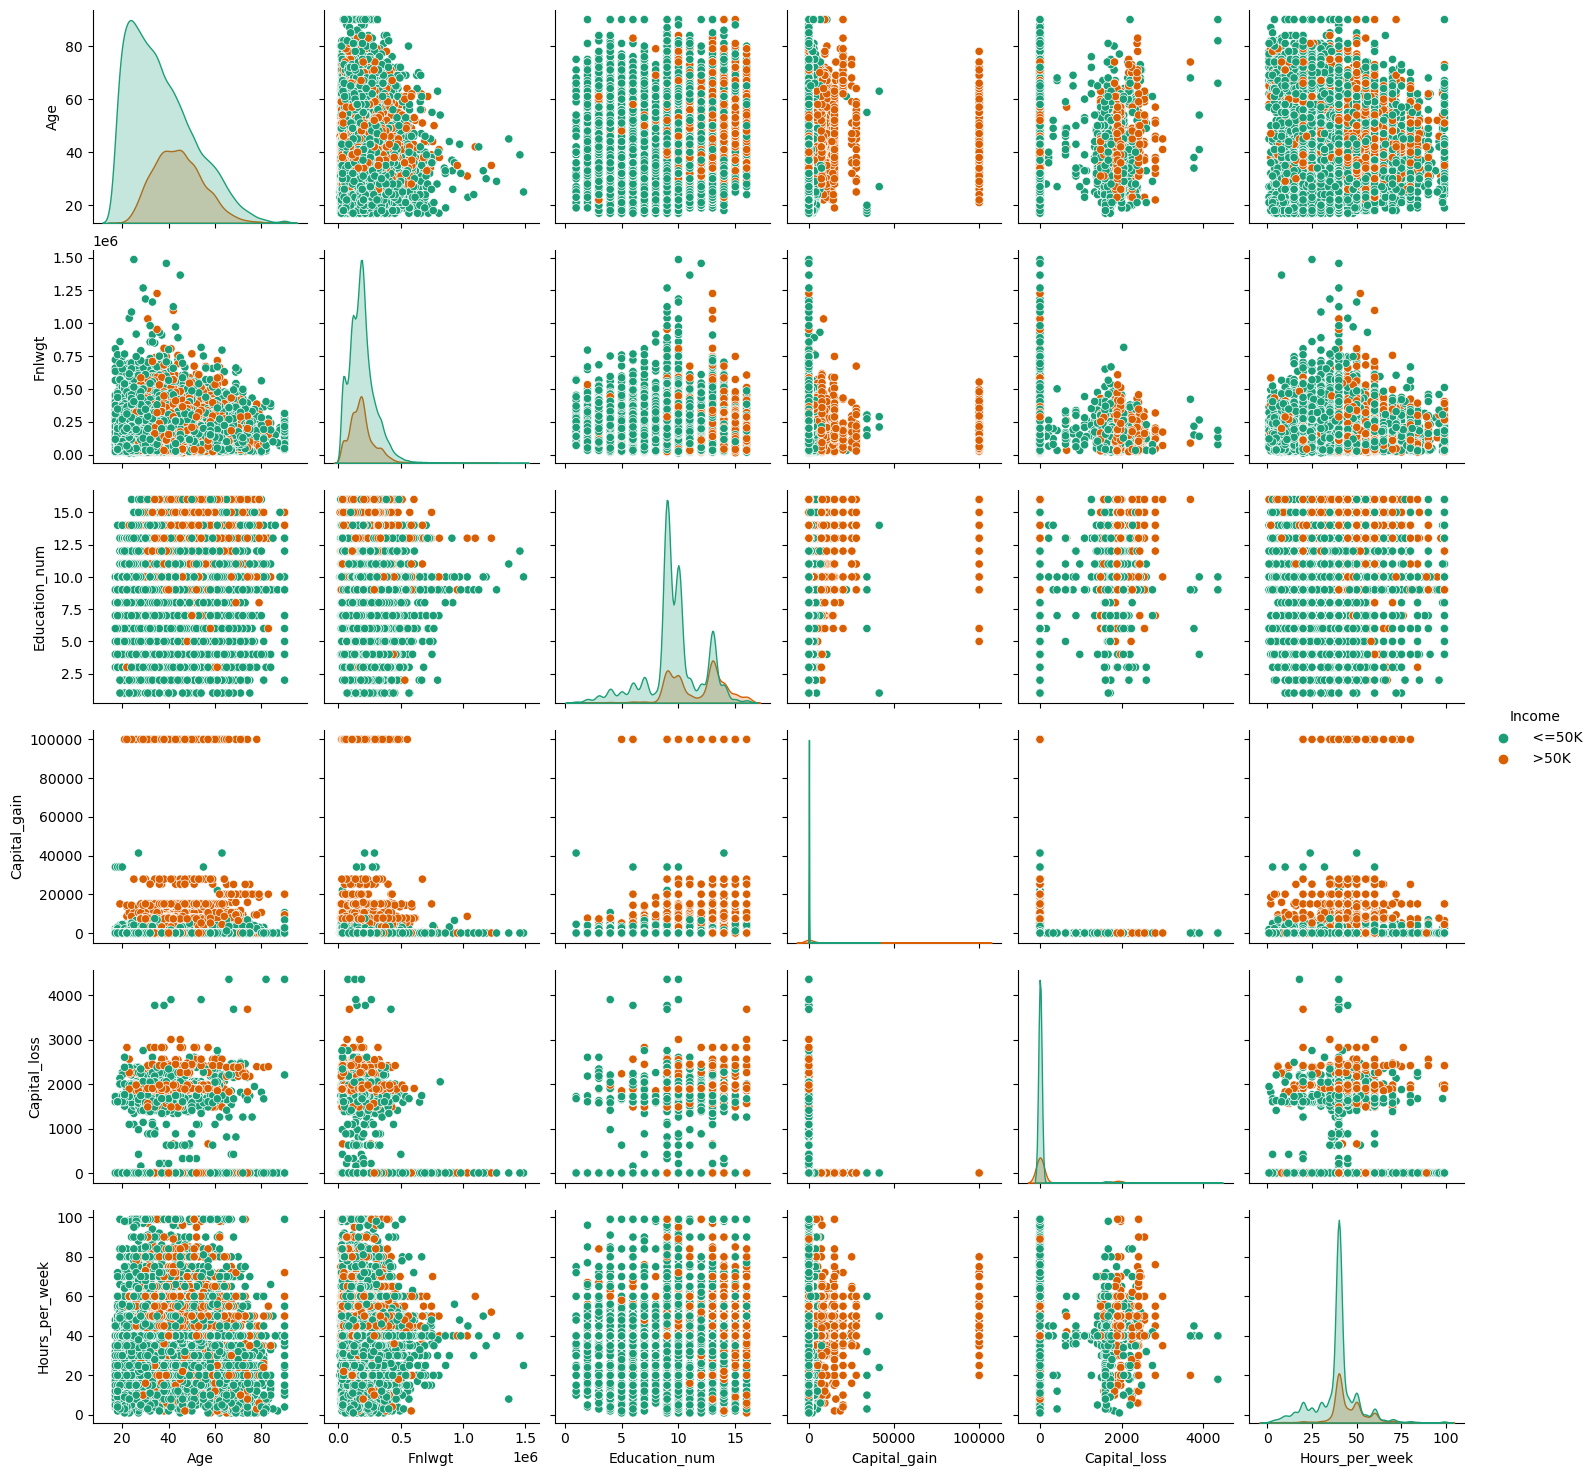

In [47]:
sns.pairplot(df,hue='Income',palette='Dark2')

# Checking the outliers.

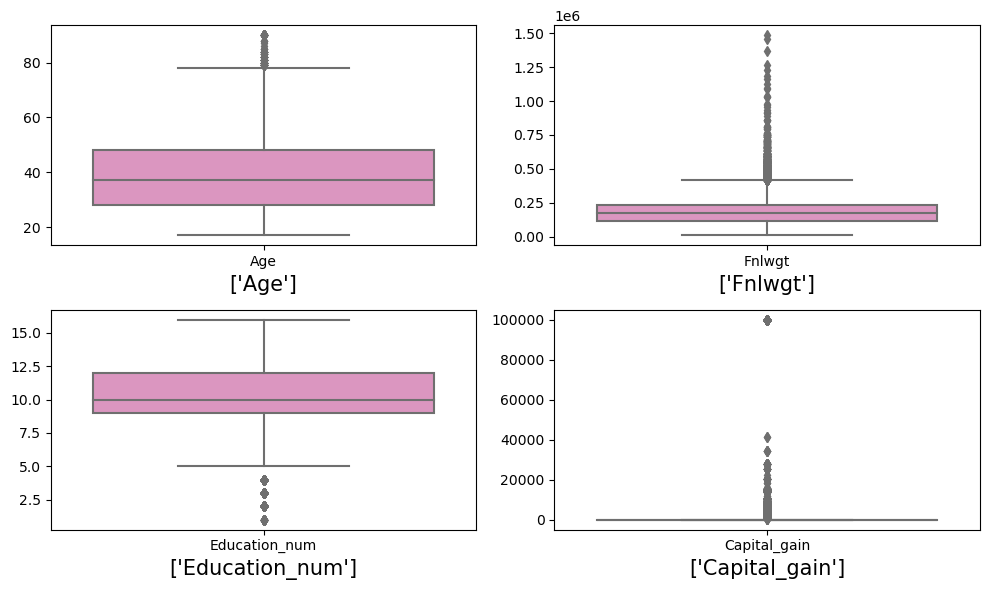

In [48]:
# Lets check the ouliers by plotting boxplot

plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [49]:
# lets check the skewness 
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [50]:
df['Fnlwgt']=np.sqrt(df['Fnlwgt'])
df['Capital_gain']=np.sqrt(df['Capital_gain'])
df['Capital_loss']=np.sqrt(df['Capital_loss'])

In [51]:
df.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week    0.227636
dtype: float64

In [52]:
df['Capital_gain']=np.cbrt(df['Capital_gain'])
df['Capital_loss']=np.cbrt(df['Capital_gain'])

In [53]:
df.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      3.227650
Capital_loss      3.036974
Hours_per_week    0.227636
dtype: float64

# Encoding Categorical columns.

In [54]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,288.636450,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.000000,13,United-States,<=50K
1,38,Private,464.377002,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.000000,40,United-States,<=50K
2,53,Private,484.480134,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.000000,40,United-States,<=50K
3,28,Private,581.729318,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.000000,40,Cuba,<=50K
4,37,Private,533.462276,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.000000,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,507.249446,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.000000,38,United-States,<=50K
32556,40,Private,392.904569,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.000000,40,United-States,>50K
32557,58,Private,389.756334,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.000000,40,United-States,<=50K
32558,22,Private,448.876375,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.000000,20,United-States,<=50K


In [55]:
oe=OrdinalEncoder()
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,288.636450,9.0,13,2.0,4.0,0.0,4.0,1.0,0.000000,0.000000,13,39.0,0.0
1,38,4.0,464.377002,11.0,9,0.0,6.0,1.0,4.0,1.0,0.000000,0.000000,40,39.0,0.0
2,53,4.0,484.480134,1.0,7,2.0,6.0,0.0,2.0,1.0,0.000000,0.000000,40,39.0,0.0
3,28,4.0,581.729318,9.0,13,2.0,10.0,5.0,2.0,0.0,0.000000,0.000000,40,5.0,0.0
4,37,4.0,533.462276,12.0,14,2.0,4.0,5.0,4.0,0.0,0.000000,0.000000,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,507.249446,7.0,12,2.0,13.0,5.0,4.0,0.0,0.000000,0.000000,38,39.0,0.0
32556,40,4.0,392.904569,11.0,9,2.0,7.0,0.0,4.0,1.0,0.000000,0.000000,40,39.0,1.0
32557,58,4.0,389.756334,11.0,9,6.0,1.0,4.0,4.0,0.0,0.000000,0.000000,40,39.0,0.0
32558,22,4.0,448.876375,11.0,9,4.0,1.0,3.0,4.0,1.0,0.000000,0.000000,20,39.0,0.0


Here we have changed the categorical columns into the numerical columns.

In [56]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.071325,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.125210,0.122329,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016512,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.024644,0.020395,0.138974,-0.007710,0.051645
Fnlwgt,-0.071325,-0.016512,1.000000,-0.029067,-0.041843,0.028033,0.002377,0.009799,-0.015211,0.024176,-0.002435,-0.002984,-0.021738,-0.057424,-0.005920
Education,-0.010508,0.023537,-0.029067,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.026646,0.023180,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.041843,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.134979,0.122355,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028033,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.067556,-0.064796,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.002377,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.021455,0.018374,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.009799,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.084681,-0.080859,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.015211,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.023926,0.023823,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.024176,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.070170,0.066871,0.229312,-0.008125,0.215995


<Axes: >

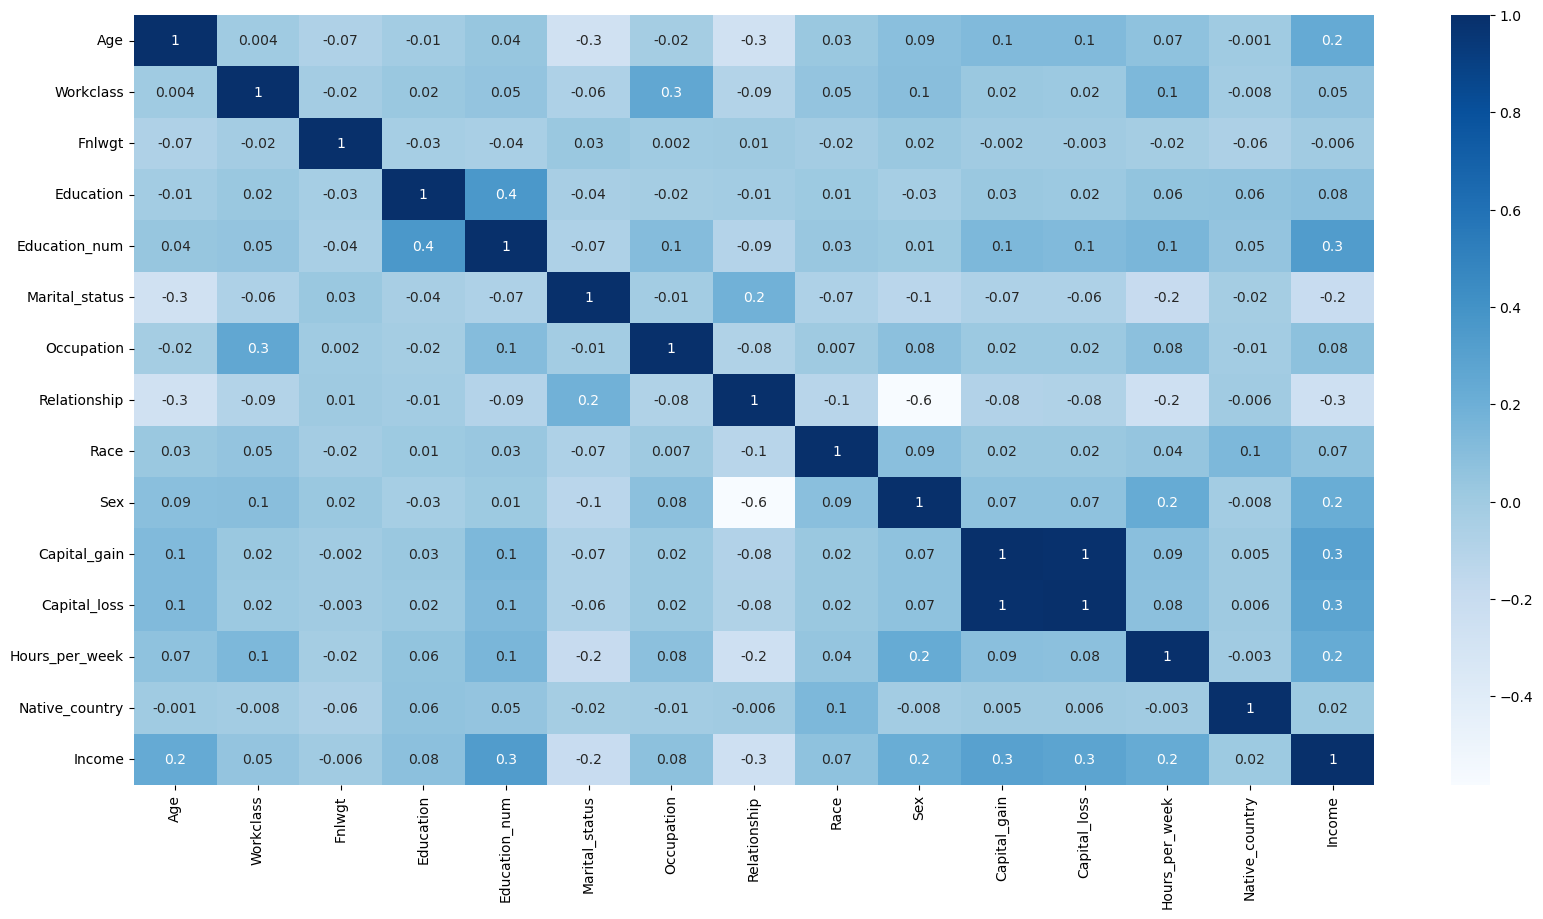

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,cmap='Blues',annot=True,fmt='.1g')

In [58]:
cor['Income'].sort_values(ascending=True)

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.005920
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Sex               0.215995
Hours_per_week    0.229690
Age               0.234039
Capital_loss      0.278174
Capital_gain      0.298063
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

as we can see in the above heatmap the features ('Sex','Hours_per_week','Age','Capital_gain','Capital_loss','Education_num') are positively correlated with the target variable('Income').

# Visualizing the correlation between label and features using bar plot.

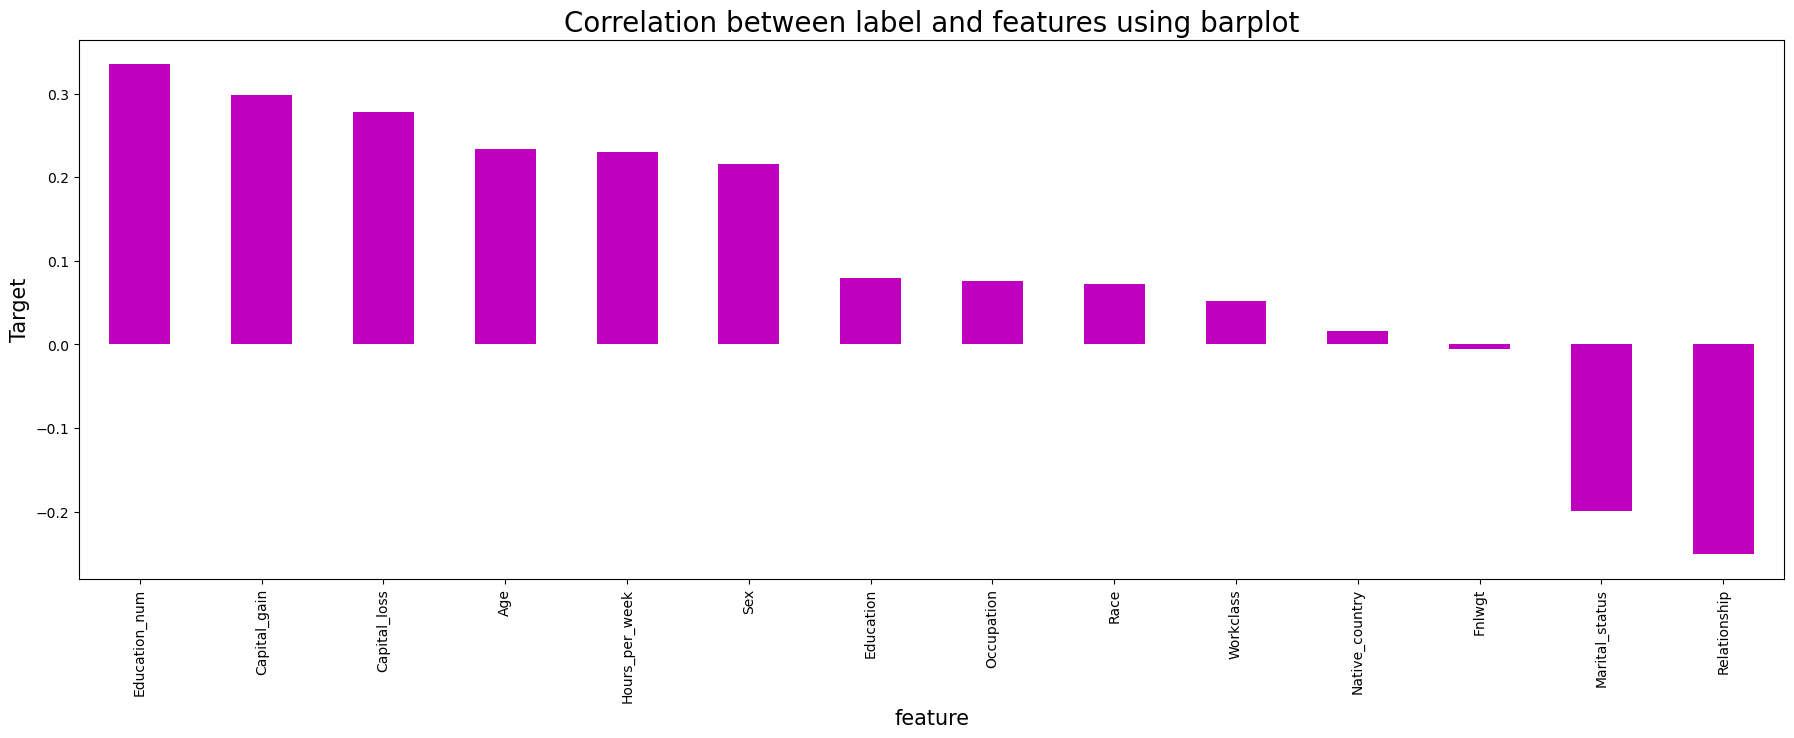

In [59]:
plt.figure(figsize=(22,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between label and features using barplot', fontsize=20)
plt.show()

# Separating the features.

In [60]:
x=df.drop('Income',axis=1)
y=df['Income']
print('the features shape',x.shape)
print('the target variable shape',y.shape)

the features shape (32560, 14)
the target variable shape (32560,)


# Scaling the input features 

In [61]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.463883,-1.088506,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.296159,-0.300829,-2.222120,0.291573
1,-0.042640,0.090121,0.380193,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.296159,-0.300829,-0.035430,0.291573
2,1.057031,0.090121,0.548199,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.296159,-0.300829,-0.035430,0.291573
3,-0.775755,0.090121,1.360929,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.296159,-0.300829,-0.035430,-4.054157
4,-0.115952,0.090121,0.957552,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.296159,-0.300829,-0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.090121,0.738486,-0.852204,0.746077,-0.406183,1.519858,2.211658,0.393675,-1.422298,-0.296159,-0.300829,-0.197407,0.291573
32556,0.103982,0.090121,-0.217117,0.181319,-0.420027,-0.406183,0.100997,-0.900177,0.393675,0.703087,-0.296159,-0.300829,-0.035430,0.291573
32557,1.423589,0.090121,-0.243427,0.181319,-0.420027,2.249503,-1.317864,1.589291,0.393675,-1.422298,-0.296159,-0.300829,-0.035430,0.291573
32558,-1.215624,0.090121,0.250651,0.181319,-0.420027,0.921660,-1.317864,0.966924,0.393675,0.703087,-0.296159,-0.300829,-1.655200,0.291573


Here we have scaled the input features for reducing the biasness of the module. so then it will give better perfomance

# Checking the variance inflation factor values.

In [62]:
vif=pd.DataFrame()
vif['Vif Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['variables']=x.columns
vif

,Vif Values,variables
0,1.165090,Age
1,1.094151,Workclass
2,1.011876,Fnlwgt
3,1.159534,Education
4,1.223294,Education_num
5,1.127634,Marital_status
6,1.091853,Occupation
7,1.682216,Relationship
8,1.038165,Race
9,1.559950,Sex


here capital_gain and the capital_loss features are creating the multicolinearity issue we have to drop one feature from that.

In [63]:
x.drop('Capital_gain',axis=1,inplace=True)

In [64]:
# again checking the vif values after droping the featur
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['variables']=x.columns
vif

,VIF values,variables
0,1.164435,Age
1,1.093684,Workclass
2,1.011762,Fnlwgt
3,1.159433,Education
4,1.212035,Education_num
5,1.127627,Marital_status
6,1.091833,Occupation
7,1.682210,Relationship
8,1.038144,Race
9,1.559684,Sex


now it looks perfect there is no issue of multicolinearity.

# Over sampling using (SMOTE)

In [65]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

we have to balanced the values so our model will learn better about both the values data.

In [66]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [67]:
y.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

now the target values are balanced .

# Modeling 

In [68]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('BEST accuracy_score is',maxAccu,'at ransom_state', maxRS)

BEST accuracy_score is 0.8997437971952535 at ransom_state 37


# creating train test split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

# Random Forest Classifier

In [70]:
# checking accuracy_score for RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.89819309600863
[[6551  858]
 [ 652 6771]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90      7409
         1.0       0.89      0.91      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



# Logistic Regression

In [71]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(lg)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

LogisticRegression()
0.7635517799352751
[[5576 1833]
 [1674 5749]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      7409
         1.0       0.76      0.77      0.77      7423

    accuracy                           0.76     14832
   macro avg       0.76      0.76      0.76     14832
weighted avg       0.76      0.76      0.76     14832



# Support vector machine

In [72]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


0.8361650485436893
[[5717 1692]
 [ 738 6685]]
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.82      7409
         1.0       0.80      0.90      0.85      7423

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



# Decision Tree Classifier.

In [73]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8468851132686084
[[6220 1189]
 [1082 6341]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      7409
         1.0       0.84      0.85      0.85      7423

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



# KNeighbors Classifier.

In [74]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

0.8501887810140237
[[5697 1712]
 [ 510 6913]]
              precision    recall  f1-score   support

         0.0       0.92      0.77      0.84      7409
         1.0       0.80      0.93      0.86      7423

    accuracy                           0.85     14832
   macro avg       0.86      0.85      0.85     14832
weighted avg       0.86      0.85      0.85     14832



# Extra Trees Classifier

In [75]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

0.9026429341963322
[[6511  898]
 [ 546 6877]]
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      7409
         1.0       0.88      0.93      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



# Ada Boost Classifier.

In [76]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(accuracy_score(y_test,pred_abc))
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

0.8557173678532902
[[6139 1270]
 [ 870 6553]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      7409
         1.0       0.84      0.88      0.86      7423

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



# Gradient Boosting Classifier.

In [77]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(accuracy_score(y_test,pred_gbc))
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.8695388349514563
[[6210 1199]
 [ 736 6687]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      7409
         1.0       0.85      0.90      0.87      7423

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832



# Cross validation score


In [78]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between the cross val score and accuracy_score',(accuracy_score(y_test,pred_dtc)-score1.mean())*100)

[0.77295712 0.82483819 0.87580906 0.88793365 0.88014565]
0.8483367329954701
difference between the cross val score and accuracy_score -0.1451619726861697


In [79]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and accuracy_score',(accuracy_score(y_test,pred_knn)-score2.mean())*100)

[0.83697411 0.84486246 0.86407767 0.86234449 0.87286336]
0.85622441763448
difference between the cross validation score and accuracy_score -0.6035636620456253


In [80]:
score3=cross_val_score(lg,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and accuracy_score',(accuracy_score(y_test,pred_lg)-score3.mean())*100)

[0.75687702 0.76102346 0.76092233 0.76352786 0.76362901]
0.7611959376390101
difference between the cross validation score and accuracy_score 0.2355842296265065


In [81]:
score4=cross_val_score(svc,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and accuracy_score',(accuracy_score(y_test,pred_svc)-score4.mean())*100)

[0.8230178  0.82170307 0.83798544 0.83705876 0.83898048]
0.8317491108261216
difference between the cross validation score and accuracy_score 0.4415937717567764


In [82]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and the accuracy_score',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.83070388 0.87307848 0.92586974 0.92990796 0.92626682]
0.8971653757033768
difference between the cross validation score and the accuracy_score 0.10277203052531103


In [83]:
score6=cross_val_score(etc,x,y)
print(score6)
print(score6.mean())
print('difference between cross validation score and the accuracy_score',(accuracy_score(y_test,pred_etc)-score6.mean())*100)

[0.86185275 0.88824838 0.92394822 0.92778396 0.92677253]
0.9057211682137604
difference between cross validation score and the accuracy_score -0.30782340174281275


In [84]:
score7=cross_val_score(abc,x,y)
print(score7)
print(score7.mean())
print('differece between the cross validation score and the accuracy_score',(accuracy_score(y_test,pred_abc)-score7.mean()))

[0.81037621 0.83859223 0.86205502 0.86517649 0.86123192]
0.8474863755747389
differece between the cross validation score and the accuracy_score 0.008230992278551286


In [85]:
score8=cross_val_score(gbc,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and the accuracy_score',(accuracy_score(y_test,pred_gbc)))

[0.8183657  0.84941343 0.88015777 0.88156165 0.87609993]
0.8611196938020995
difference between the cross validation score and the accuracy_score 0.8695388349514563


Here our Extra Trees Classifier is giving high accuracy that's why it is our best performing model.

In [86]:
param={'n_estimators':[100,150,200,250,300],
      'criterion':['gini','entropy','log_loss'],
      'max_depth':[5,10,15,20],
      'min_samples_split':[2,4,5,8]}

In [87]:
grid=GridSearchCV(ExtraTreesClassifier(),param,cv=5)


In [88]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 4, 5, 8],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [90]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 200}

In [91]:
final_model1=ExtraTreesClassifier(criterion='entropy',max_depth=30,min_samples_split=3,n_estimators=300)
final_model1.fit(x_train,y_train)
pred1=final_model1.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

0.8965075512405609
[[6297 1112]
 [ 423 7000]]
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      7409
         1.0       0.86      0.94      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



In [92]:
final_model2=ExtraTreesClassifier(criterion='gini',max_depth=20,min_samples_split=2,n_estimators=200)
final_model2.fit(x_train,y_train)
pred2=final_model2.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

0.8747977346278317
[[5992 1417]
 [ 440 6983]]
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87      7409
         1.0       0.83      0.94      0.88      7423

    accuracy                           0.87     14832
   macro avg       0.88      0.87      0.87     14832
weighted avg       0.88      0.87      0.87     14832



# Saving model

In [93]:
import joblib


In [94]:
joblib.dump(final_model1,'census_income_prediction.pkl')

['census_income_prediction.pkl']

In [98]:
model=joblib.load('census_income_prediction.pkl')
predicted=model.predict(x_test)
predicted

array([0., 0., 0., ..., 0., 0., 1.])

In [99]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=predicted
df['original']=a
df

,prediction,original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
14827,0.0,0.0
14828,0.0,0.0
14829,0.0,0.0
14830,0.0,0.0
